# Car Insurance Claims - Binary Classification

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.

#### Data Dictionary

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children : <br><ul><li>`0`: No children</li><li>`1`: Has Children</li></ul>|
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import logit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\7_Car_Insurance\car_insurance.csv')

In [3]:
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
df.isna().sum()

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [5]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
# Filling in missing values

df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].mean())

## Using Statsmodels Module

In [7]:
models = []

features = df.drop(columns=['id','outcome']).columns

for feature in features:
    model = logit(f'outcome ~ {feature}', data=df).fit()
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [8]:
accuracy_scores = []

for feature in range(0, len(models)):
    cm = models[feature].pred_table()
    true_neg = cm[0,0]
    true_pos = cm[1,1]
    false_neg = cm[1,0]
    false_pos = cm[0,1]
    accuracy = (true_neg + true_pos) / (true_neg + false_neg + false_pos + true_pos)
    accuracy_scores.append(accuracy)
    best_feature = features[accuracy_scores.index(max(accuracy_scores))]
print(best_feature)

driving_experience


In [9]:
best_feature_df = pd.DataFrame({"best_feature": best_feature,
                                "best_accuracy": max(accuracy_scores)},
                                index=[0])

best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771


## Using Logistic Regression and Random Forest

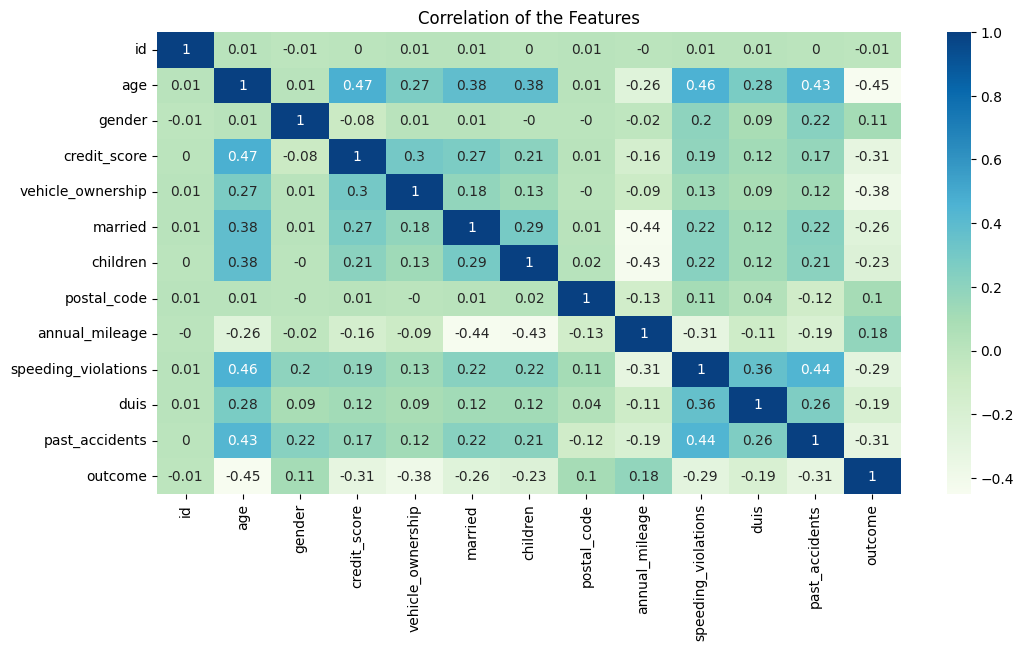

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(round(df.corr(numeric_only=True), 2), annot=True, cmap='GnBu')
plt.title('Correlation of the Features')
plt.show()

The heatmap above displays how different features in the dataset relate to each other. For our target variable 'outcome', we notice a negative relationship with the 'age' feature. This suggests that younger individuals tend to make more car insurance claims. While some correlations between features are present, none of them are particularly strong. However, it's important to note that this heatmap only considers numerical features and doesn't include object data types, so further investigation is needed.

In [11]:
# Correct Data Type
df['postal_code'] = df['postal_code'].astype('object')
df['outcome'] = df['outcome'].astype('int16')

# Ordinal Categorical
df['driving_experience'] = df['driving_experience'].map(lambda x: 0 if x=='0-9y' else 1 if x=='10-19y' else 2 if x=='20-29y' else 3)
df['education'] = df['education'].map(lambda x: 0 if x=='none' else 1 if x=='high school' else 2)
df['income'] = df['income'].map(lambda x: 0 if x=='poverty' else 1 if x=='working class' else 2 if x=='middle class' else 3)
df['vehicle_year'] = df['vehicle_year'].map(lambda x: 0 if x=='before 2015' else 1)

# Nominal Categorical
df['gender'] = df['gender'].map(lambda x: 'Male' if x==0 else 'Female')

In [12]:
df_update = pd.get_dummies(df, dtype='int')

df_update.head()

,id,age,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,...,past_accidents,outcome,gender_Female,gender_Male,postal_code_10238,postal_code_21217,postal_code_32765,postal_code_92101,vehicle_type_sedan,vehicle_type_sports car
0,569520,3,0,1,3,0.629027,1.0,1,0.0,1.0,...,0,0,0,1,1,0,0,0,1,0
1,750365,0,0,0,0,0.357757,0.0,0,0.0,0.0,...,0,1,1,0,1,0,0,0,1,0
2,199901,0,0,1,1,0.493146,1.0,0,0.0,0.0,...,0,0,0,1,1,0,0,0,1,0
3,478866,0,0,2,1,0.206013,1.0,0,0.0,1.0,...,0,0,1,0,0,0,1,0,1,0
4,731664,1,1,0,1,0.388366,1.0,0,0.0,0.0,...,1,1,1,0,0,0,1,0,1,0


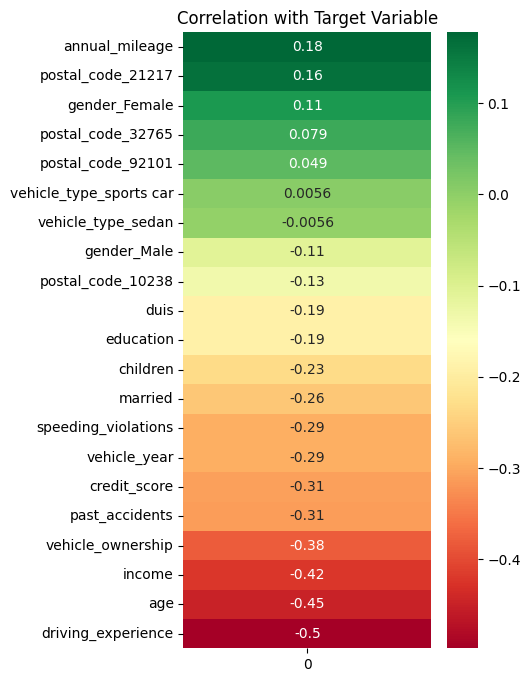

In [14]:
features_corr = df_update.drop(columns=['id','outcome'])
target = df_update['outcome']

corr_outcome = features_corr.corrwith(target).sort_values(ascending=False)
plt.figure(figsize=(4, 8))
sns.heatmap(corr_outcome.to_frame(), cmap='RdYlGn', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

Once we've cleaned the dataset and converted categorical features into numeric ones, we observe that the 'driving_experience' feature exhibits the strongest negative correlation with the target variable 'outcome'.

In [15]:
# Scale Feature
scaler = StandardScaler()
features_unscaled = df_update.drop(columns=['id', 'outcome'])
features_scaled = scaler.fit_transform(features_unscaled)
df_preprocess = pd.DataFrame(features_scaled, columns=features_unscaled.columns)

df_preprocess.head()

,age,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,...,duis,past_accidents,gender_Female,gender_Male,postal_code_10238,postal_code_21217,postal_code_32765,postal_code_92101,vehicle_type_sedan,vehicle_type_sports car
0,1.473333,-1.079662,-0.272981,0.957659,0.865914,0.659333,1.515607,-0.996406,0.672161,0.113057,...,-0.43102,-0.639263,-0.998002,0.998002,0.664020,-0.110208,-0.570576,-0.225525,0.223806,-0.223806
1,-1.452849,-1.079662,-1.629073,-1.653189,-1.208879,-1.516684,-0.659802,-0.996406,-1.487739,1.605576,...,-0.43102,-0.639263,1.002002,-1.002002,0.664020,-0.110208,-0.570576,-0.225525,0.223806,-0.223806
2,-1.452849,-1.079662,-0.272981,-0.782906,-0.173367,0.659333,-0.659802,-0.996406,-1.487739,-0.260073,...,-0.43102,-0.639263,-0.998002,0.998002,0.664020,-0.110208,-0.570576,-0.225525,0.223806,-0.223806
3,-1.452849,-1.079662,1.083110,-0.782906,-2.369485,0.659333,-0.659802,-0.996406,0.672161,-0.260073,...,-0.43102,-0.639263,1.002002,-1.002002,-1.505979,-0.110208,1.752616,-0.225525,0.223806,-0.223806
4,-0.477455,-0.069972,-1.629073,-0.782906,-0.974770,0.659333,-0.659802,-0.996406,-1.487739,0.113057,...,-0.43102,-0.034072,1.002002,-1.002002,-1.505979,-0.110208,1.752616,-0.225525,0.223806,-0.223806


In [16]:
X = df_preprocess
y = df['outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 21) (2000, 21) (8000,) (2000,)


In [17]:
logi_model = LogisticRegression(random_state=42)
rfc_model = RandomForestClassifier(random_state=42, n_estimators=50)

logi_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)

logi_pred = logi_model.predict(X_test)
rfc_pred = rfc_model.predict(X_test)

logi_acc = accuracy_score(y_test, logi_pred)
logi_precision = precision_score(y_test, logi_pred)
logi_recall = recall_score(y_test, logi_pred)
logi_roc_auc = roc_auc_score(y_test, logi_pred)

rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred)
rfc_recall = recall_score(y_test, rfc_pred)
rfc_roc_auc = roc_auc_score(y_test, rfc_pred)

score_df = pd.DataFrame({'Accuracy Score':[logi_acc,rfc_acc], 'Precision Score':[logi_precision,rfc_precision],
                         'Recall Score':[logi_recall,rfc_recall], 'ROC AUC Score':[logi_roc_auc,rfc_roc_auc]}, index=['Logistic','RandomForest'])
score_df

,Accuracy Score,Precision Score,Recall Score,ROC AUC Score
Logistic,0.8460,0.757674,0.748006,0.819378
RandomForest,0.8305,0.735294,0.717703,0.799857


It's intriguing to note that both the logistic regression and random forest models demonstrate higher accuracy scores compared to the logit model. However, when considering overall performance, the logistic regression model consistently outperforms the random forest model across various metrics.

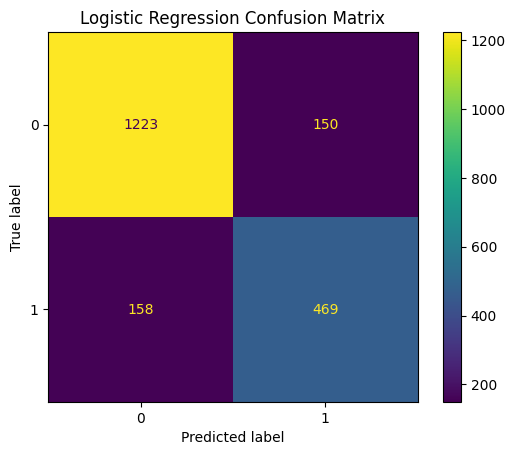

In [24]:
logi_cm = confusion_matrix(y_test, logi_pred, labels=logi_model.classes_)

logi_disp = ConfusionMatrixDisplay(confusion_matrix=logi_cm, display_labels=logi_model.classes_)
logi_disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

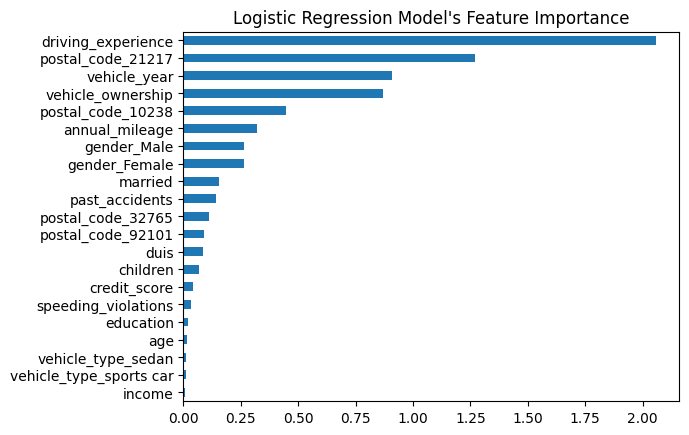

In [22]:
logi_coef = pd.Series(np.abs(logi_model.coef_).reshape(-1), index=X.columns).sort_values()
logi_coef.plot(kind='barh')
plt.title("Logistic Regression Model's Feature Importance")
plt.show()

In the logistic regression model, we observe 150 false positives and 158 false negatives. The top three most influential features in this model are 'driving_experience', consistent with the logit model, followed by 'postal_code_21217' and 'vehicle_year'.

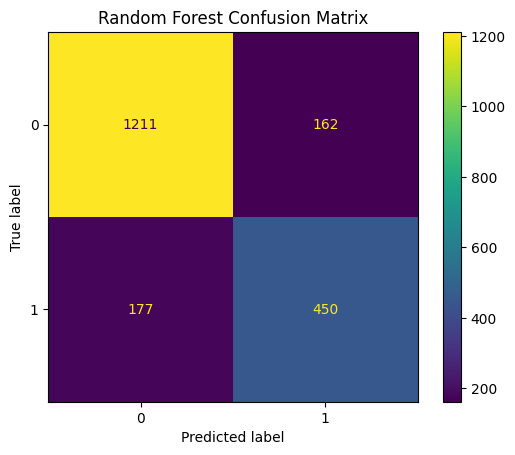

In [25]:
rfc_cm = confusion_matrix(y_test, rfc_pred, labels=rfc_model.classes_)

logi_disp = ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=rfc_model.classes_)
logi_disp.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

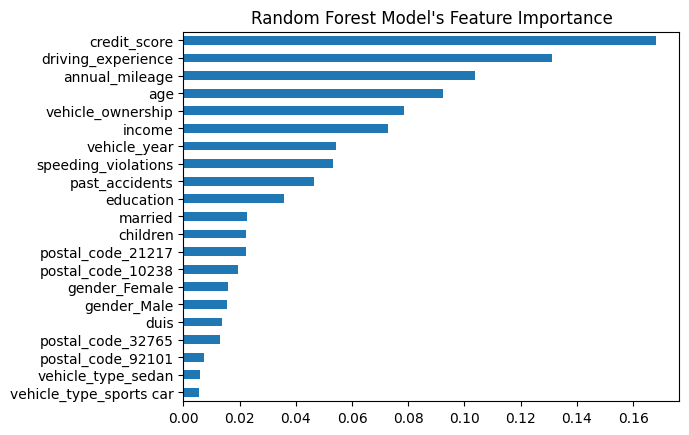

In [23]:
feature_importance = pd.Series(rfc_model.feature_importances_, index=X.columns).sort_values()
feature_importance.plot(kind='barh')
plt.title("Random Forest Model's Feature Importance")
plt.show()

For the random forest model, we identified 162 false positives and 177 false negatives. The top 5 important features in this model include 'credit_score', 'driving_experience', 'annual_mileage', 'age', and 'vehicle_ownership'.